<a href="https://colab.research.google.com/github/Mervvick/AI_Autoencoder_Pro/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%90%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D0%B0_%D0%B0%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B0_(Autoencoder)_%7C_%D0%94%D0%97_Pro_%7C_%D0%A3%D0%98%D0%98%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание Pro


Обучите автокодировщик на 10 красивых цифрах 5 из mnist и отредактируйте с помощью него все остальные цифры 5.

Алгоритм действий:
1. Выберите 10 самых красивых по вашем мнению пятерок в тренировочной выборке mnist.
2. Создайте датасет, где объекты – это все пятерки из тренировочной части mnist, а метки – это случайные пятерки из "красивого" набора.
3. Создайте автокодировщик и проверьте, совпадают ли у него размеры выхода и входа.
4. Обучите автокодировщик.
5. Добейтесь ошибки MSE на тренировочной выборке **<0.05**.
6. Посмотрите, как выглядят пятерки из тестовой выборки после обученного автокодировщика.

## Импорт библиотек

In [ ]:
# Для операций с тензорами
import numpy as np

# Для отрисвоки
import matplotlib.pyplot as plt

# Для создания модели
from tensorflow.keras.models import Model

# Необходимые слои
from tensorflow.keras.layers import Input, Conv2DTranspose, MaxPooling2D, Conv2D, BatchNormalization

# Слои для латентного пространства модели
from tensorflow.keras.layers import Flatten, Reshape, Dense

# Оптимизатор
from tensorflow.keras.optimizers import Adam

# Для загрузки базы
from tensorflow.keras.datasets import mnist

from random import randint, shuffle

In [ ]:
# Функция последовательного вывода нескольких изображений для сравнения
def plot_images(x_data, pred, n=5):

    plt.figure(figsize=(14, 7))                     # Размер полотна

    for i in range(1, n + 1):                              # Повтор n раз:
        index = np.random.randint(0, pred.shape[0]) # Выбор случайного индекса

        # Показ картинки с индексом index из набора x_data
        ax = plt.subplot(2, n, i)               # Картинка располагается в верхнем ряду
        plt.imshow(x_data[index].squeeze(), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Показ картинки с тем же индексом из предсказания автокодировщика
        ax = plt.subplot(2, n, i + n)           # Картинка располагается в нижнем ряду
        plt.imshow(pred[index].squeeze(), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

## Загрузка данных

In [ ]:
# Загрузка датасета
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Нормализация данных
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [ ]:
# Приведение формы к удобной для Keras
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# Отбор пятерок
mask = y_train == 5
X_train = X_train[mask]
y_train = y_train[mask]

In [ ]:
# Аналогично для тестирования
mask = y_test == 5
X_test = X_test[mask]
y_test = y_test[mask]

## Отбор красивых пятерок

In [ ]:
print(X_train.shape)

(5421, 28, 28, 1)


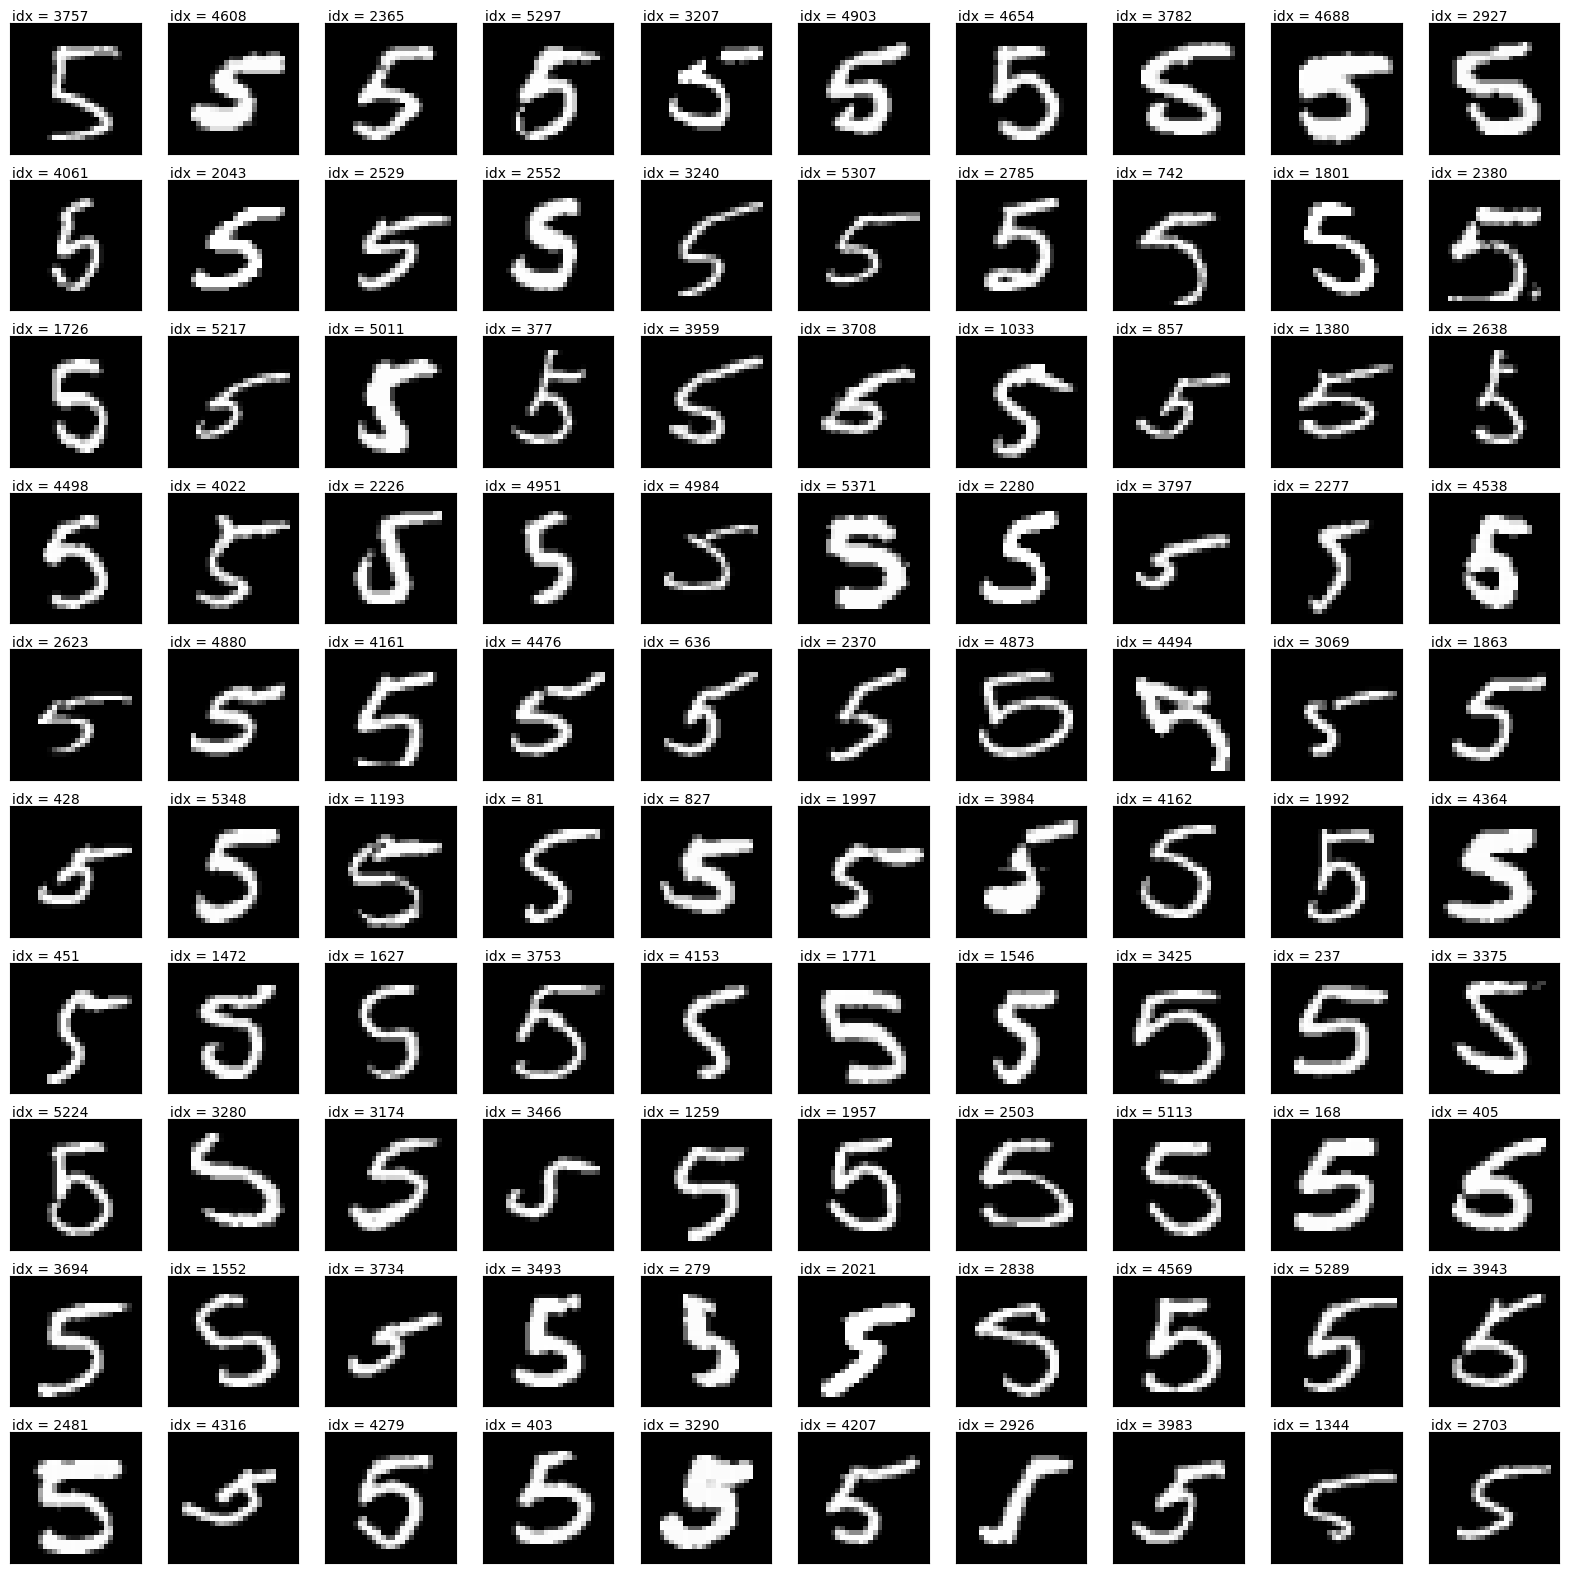

In [ ]:
# Ваше решение

plt.figure(figsize = (20, 20))
row = 10
col = 10
n = 1

for i in range(row):
    for j in range(col):
        start = randint(0, X_train.shape[0]- col)

        axs = plt.subplot(row, col, n + j)

        axs.imshow(X_train[start + j], cmap = 'gray',)
        axs.get_xaxis().set_visible(False)
        axs.get_yaxis().set_visible(False)
        axs.text(x = 0, y = -1, s = f'idx = {start + j}')
    n += col

plt.show()

# Создание датасета

In [ ]:
pretty_idxs = [2, 1502, 3851, 1431, 1534, 1601, 2762, 2879, 78, 5409]

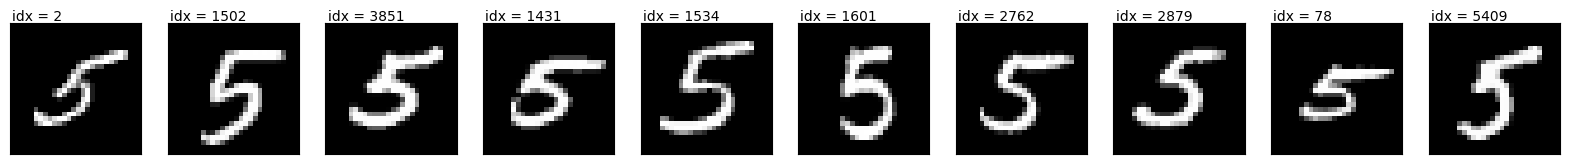

In [ ]:
plt.figure(figsize = (20, 10))
for i in range(len(pretty_idxs)):
    axs = plt.subplot(1, 10, i + 1)
    axs.imshow(X_train[pretty_idxs[i]], cmap = 'gray')
    axs.get_xaxis().set_visible(False)
    axs.get_yaxis().set_visible(False)
    axs.text(x = 0, y = -1, s = f'idx = {pretty_idxs[i]}')

plt.show()

In [ ]:
x_train_pretty_idxs = pretty_idxs * int(np.ceil(X_train.shape[0] / 10))
x_train_pretty_idxs = x_train_pretty_idxs[:X_train.shape[0]]
print(x_train_pretty_idxs[:22])

shuffle(x_train_pretty_idxs)
print(x_train_pretty_idxs[:22])

x_train_pretty = X_train[x_train_pretty_idxs]
print(x_train_pretty.shape)

[2, 1502, 3851, 1431, 1534, 1601, 2762, 2879, 78, 5409, 2, 1502, 3851, 1431, 1534, 1601, 2762, 2879, 78, 5409, 2, 1502]
[1601, 5409, 78, 5409, 78, 3851, 5409, 2, 1534, 2, 1431, 1534, 2762, 3851, 1534, 1601, 78, 3851, 78, 1534, 2762, 5409]
(5421, 28, 28, 1)


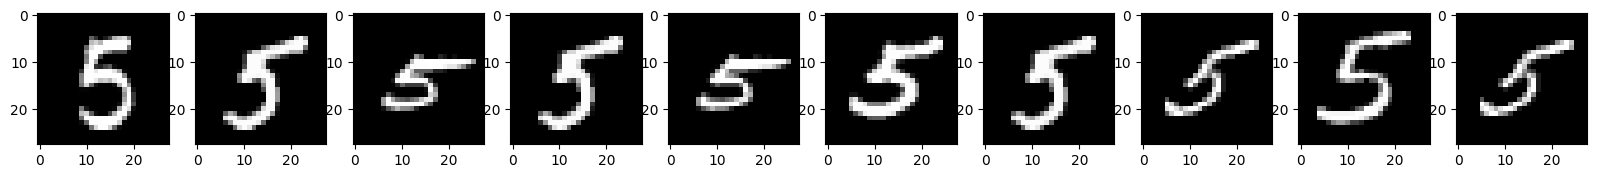

In [ ]:
plt.figure(figsize = (20, 10))
for i in range(10):
  axs = plt.subplot(1, 10, i + 1)
  axs.imshow(x_train_pretty[i], cmap = 'gray')
plt.show()

# Архитектура автокодировщика

In [ ]:
input = Input(X_train.shape[1:])
# x = Conv2D(16, (3, 3), padding = 'same', activation = 'relu')(input)
# x = BatchNormalization()(x)
x = Conv2D(16, (3, 3), padding = 'same', activation = 'relu', strides = 2)(input)
x = BatchNormalization()(x)
# x = Conv2D(32, (3, 3), padding = 'same', activation = 'relu')(x)
# x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding = 'same', activation = 'relu', strides = 2)(x)
x = BatchNormalization()(x)

pre_flat_shape = x.shape[1:]
x = Flatten()(x)
flat_shape = x.shape[1]

# x = Dense(256, activation = 'relu')(x)
x = Dense(2)(x)
# x = Dense(256, activation = 'relu')(x)

x = Dense(flat_shape, activation = 'relu')(x)
x = Reshape(pre_flat_shape)(x)

# x = Conv2D(32, (3, 3), padding = 'same', activation = 'relu')(x)
# x = BatchNormalization()(x)
x = Conv2DTranspose(32, (3, 3), activation = 'relu', padding = 'same', strides = 2)(x)
x = BatchNormalization()(x)
# x = Conv2D(16, (3, 3), padding = 'same', activation = 'relu')(x)
# x = BatchNormalization()(x)
x = Conv2DTranspose(16, (3, 3), activation = 'relu', padding = 'same', strides = 2)(x)
x = BatchNormalization()(x)

output = Conv2D(1, (3,3), activation = 'sigmoid', padding = 'same')(x)

autoencoder = Model(input, output)

autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 14, 14, 16)        160       
                                                                 
 batch_normalization_35 (Bat  (None, 14, 14, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 7, 7, 32)          4640      
                                                                 
 batch_normalization_36 (Bat  (None, 7, 7, 32)         128       
 chNormalization)                                                
                                                                 
 flatten_5 (Flatten)         (None, 1568)              0   

In [ ]:
autoencoder.compile(Adam(0.001), loss = 'MSE', metrics = ['accuracy'])

In [ ]:
history = autoencoder.fit(X_train,
                          x_train_pretty,
                          batch_size = 16,
                          epochs = 10,
                          verbose = 1,
                          shuffle = True
                          )

Epoch 1/10
339/339 [==============================] - 13s 33ms/step - loss: 0.0764 - accuracy: 0.7764
Epoch 2/10
339/339 [==============================] - 9s 26ms/step - loss: 0.0623 - accuracy: 0.7916
Epoch 3/10
339/339 [==============================] - 11s 34ms/step - loss: 0.0578 - accuracy: 0.7940
Epoch 4/10
339/339 [==============================] - 10s 29ms/step - loss: 0.0513 - accuracy: 0.7966
Epoch 5/10
339/339 [==============================] - 11s 33ms/step - loss: 0.0504 - accuracy: 0.7973
Epoch 6/10
339/339 [==============================] - 9s 26ms/step - loss: 0.0502 - accuracy: 0.7975
Epoch 7/10
339/339 [==============================] - 10s 29ms/step - loss: 0.0496 - accuracy: 0.7975
Epoch 8/10
339/339 [==============================] - 10s 29ms/step - loss: 0.0478 - accuracy: 0.7982
Epoch 9/10
339/339 [==============================] - 10s 30ms/step - loss: 0.0463 - accuracy: 0.7991
Epoch 10/10
339/339 [==============================] - 10s 28ms/step - loss: 0.0457 

28/28 [==============================] - 1s 24ms/step


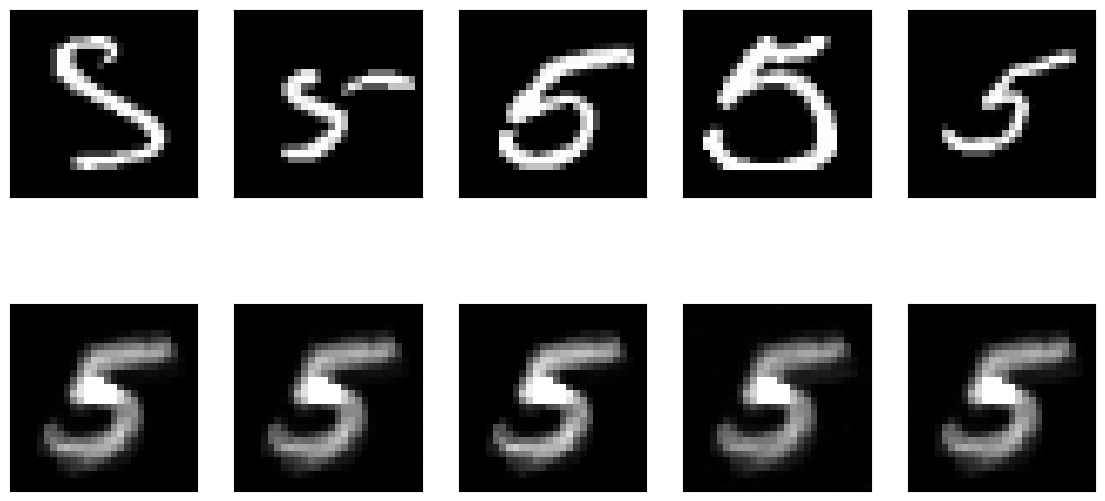

In [ ]:
pred = autoencoder.predict(X_test)

plot_images(X_test, pred)

Пятерки становятся "красивее" хотя и более размытыми и с белой областью в середине